# Import Library & Data

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
# importing or loading the dataset 
Data_for_PCA = pd.read_csv(r"Clean_Data.csv")

Data_for_PCA.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796,5250,10703,1659,1961,Open,CAT B,530,6649000
1,8294,8186,12694,1461,1752,Not Provided,CAT B,210,3982000
2,11001,14399,16991,1340,1609,Not Provided,CAT A,720,5401000
3,8301,11188,12289,1451,1748,Covered,CAT B,620,5373000
4,10510,12629,13921,1770,2111,Not Provided,CAT B,450,4662000


<Axes: >

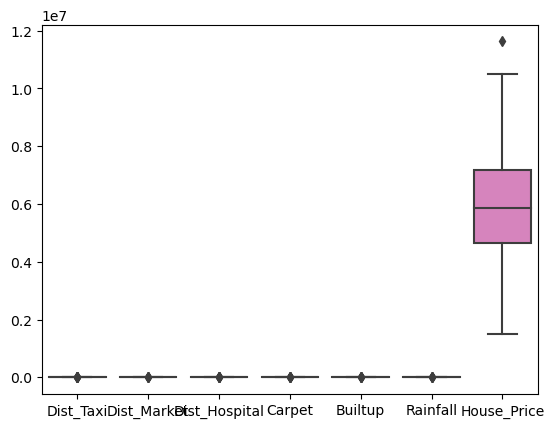

In [12]:
import seaborn as sns
sns.boxplot(data=Data_for_PCA)

## Taking specific column for Analysis

In [13]:
numeric_predictors = ['Dist_Taxi','Dist_Market','Dist_Hospital','Carpet','Builtup','Rainfall']
X_train = Data_for_PCA[numeric_predictors]
y_train = Data_for_PCA['House_Price']

In [14]:
X_train.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall
0,9796,5250,10703,1659,1961,530
1,8294,8186,12694,1461,1752,210
2,11001,14399,16991,1340,1609,720
3,8301,11188,12289,1451,1748,620
4,10510,12629,13921,1770,2111,450


In [15]:
Correlation = X_train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall
Dist_Taxi,1.000000,0.453479,0.795520,0.008703,0.008230,0.013540
Dist_Market,0.453479,1.000000,0.621466,-0.020778,-0.020384,0.069806
Dist_Hospital,0.795520,0.621466,1.000000,0.011706,0.011960,0.046826
Carpet,0.008703,-0.020778,0.011706,1.000000,0.998885,-0.043485
Builtup,0.008230,-0.020384,0.011960,0.998885,1.000000,-0.043424
Rainfall,0.013540,0.069806,0.046826,-0.043485,-0.043424,1.000000


### PCA is effected by scale so you need to scale the features in the data before applying PCA. 

* You can transform the data onto unit scale (mean = 0 and variance = 1) 

In [16]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
  
X_train_1 = sc.fit_transform(X_train)  # Fit to data, then transform it.

### Mean

X_train_1.mean(axis=0)

### Standard Deviation

X_train_1.std(axis=0)

In [17]:
X_train.head(3)

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall
0,9796,5250,10703,1659,1961,530
1,8294,8186,12694,1461,1752,210
2,11001,14399,16991,1340,1609,720


In [18]:
X_train_1

array([[ 0.61846877, -2.28157722, -0.92900726,  0.69361583,  0.59646551,
        -0.95701769],
       [ 0.02372157, -1.11957706, -0.15298842, -0.09834013, -0.10106539,
        -2.15638182],
       [ 1.09561283,  1.3393831 ,  1.52182472, -0.58231321, -0.57832337,
        -0.24489525],
       ...,
       [-0.32116845,  0.27434821,  0.05202711, -1.14228207, -1.1557054 ,
         1.02942913],
       [ 2.71156711,  1.45851186,  2.5453433 , -0.74630409, -0.74185932,
        -0.0574946 ],
       [ 0.42087965,  0.60244703,  0.51896361, -1.24627629, -1.17906768,
         1.21682978]])

# No. of variable in original dataset

In [19]:
from sklearn.decomposition import PCA 
  
model = PCA(n_components = 3) # we are specifying we want 3 PCA
  
principalComponents= model.fit(X_train_1) # Fit the model with X and apply the dimensionality reduction on X.

# Explained Variance
* The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

* This is important as while you can convert high dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, 

In [20]:
import numpy as np
list(np.round(principalComponents.explained_variance_,2))   # eigen values  >= 1 

[2.26, 2.01, 1.0]

In [21]:
np.round(2.26/6,2)

0.38

In [22]:
list(np.round(principalComponents.explained_variance_ratio_,2))    # >= 50%

[0.38, 0.33, 0.17]

In [23]:
0.38+ 0.33+0.17

0.88

* You can see that the first principal component contains 38% of the variance 

* The second principal component contains 33% of the variance & third  PC contain 17%.

* Together, the three components contain 88% of the information.

principalComponents.mean_

principalComponents.get_covariance()

In [24]:
X_train_1 ### scaled dataset

array([[ 0.61846877, -2.28157722, -0.92900726,  0.69361583,  0.59646551,
        -0.95701769],
       [ 0.02372157, -1.11957706, -0.15298842, -0.09834013, -0.10106539,
        -2.15638182],
       [ 1.09561283,  1.3393831 ,  1.52182472, -0.58231321, -0.57832337,
        -0.24489525],
       ...,
       [-0.32116845,  0.27434821,  0.05202711, -1.14228207, -1.1557054 ,
         1.02942913],
       [ 2.71156711,  1.45851186,  2.5453433 , -0.74630409, -0.74185932,
        -0.0574946 ],
       [ 0.42087965,  0.60244703,  0.51896361, -1.24627629, -1.17906768,
         1.21682978]])

# Beta Values or Eigen Vector 
Z1 = Beta1*x1+Beta2*X2 + beta3*X3 + ..... + beta13*X13


In [25]:
principalComponents.components_   ##  BETA VALUES  Z1 , Z2 & Z3 

array([[-0.58073993, -0.51944522, -0.62408786,  0.00354015,  0.00349942,
        -0.05837261],
       [ 0.0147218 , -0.01752286,  0.01458963,  0.70551362,  0.70550669,
        -0.06143455],
       [ 0.0923583 , -0.04204714,  0.0413229 , -0.04504566, -0.04515597,
        -0.99193056]])

z1=(-0.58073993*0.61846877) + (-0.51944522 *-2.28157722) + (-0.62408786*0.92900726)+(0.00354015*0.69361583)+(0.00349942*0.59646551)+(-0.05837261*-0.95701769)
z1

### Renaming the Columns  

* Prediction for data to get data reduction 


In [26]:
X_train_1  # scaled data

array([[ 0.61846877, -2.28157722, -0.92900726,  0.69361583,  0.59646551,
        -0.95701769],
       [ 0.02372157, -1.11957706, -0.15298842, -0.09834013, -0.10106539,
        -2.15638182],
       [ 1.09561283,  1.3393831 ,  1.52182472, -0.58231321, -0.57832337,
        -0.24489525],
       ...,
       [-0.32116845,  0.27434821,  0.05202711, -1.14228207, -1.1557054 ,
         1.02942913],
       [ 2.71156711,  1.45851186,  2.5453433 , -0.74630409, -0.74185932,
        -0.0574946 ],
       [ 0.42087965,  0.60244703,  0.51896361, -1.24627629, -1.17906768,
         1.21682978]])

In [27]:
transformed_data = principalComponents.fit_transform(X_train_1)  ### only give data which is transformed ( principal component)
transformed_data

array([[ 1.46617342,  1.00449064,  1.00578199],
       [ 0.78843292,  0.00952911,  2.19091849],
       [-2.2715447 , -0.78893345,  0.40302242],
       ...,
       [-0.05664161, -1.69327246, -0.95652859],
       [-3.92273216, -0.9948848 ,  0.41843821],
       [-0.96080632, -1.78264943, -1.06264373]])

In [28]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (897, 6)
transformed shape: (897, 3)


In [29]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['Data PC1', 'Data PC2', 'Data PC3'])
principalDf.head()

,Data PC1,Data PC2,Data PC3
0,1.466173,1.004491,1.005782
1,0.788433,0.009529,2.190918
2,-2.271545,-0.788933,0.403022
3,0.178285,-0.145595,0.612814
4,-0.976963,1.660620,1.215744


# To check the Principal Component is uncorrelated / independent

In [30]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Data PC1,Data PC2,Data PC3
Data PC1,1.000000,-0.000000,0.000000
Data PC2,-0.000000,1.000000,0.000000
Data PC3,0.000000,0.000000,1.000000


## Identify variable is combining together in Which PCA 

In [31]:
X_train_1

array([[ 0.61846877, -2.28157722, -0.92900726,  0.69361583,  0.59646551,
        -0.95701769],
       [ 0.02372157, -1.11957706, -0.15298842, -0.09834013, -0.10106539,
        -2.15638182],
       [ 1.09561283,  1.3393831 ,  1.52182472, -0.58231321, -0.57832337,
        -0.24489525],
       ...,
       [-0.32116845,  0.27434821,  0.05202711, -1.14228207, -1.1557054 ,
         1.02942913],
       [ 2.71156711,  1.45851186,  2.5453433 , -0.74630409, -0.74185932,
        -0.0574946 ],
       [ 0.42087965,  0.60244703,  0.51896361, -1.24627629, -1.17906768,
         1.21682978]])

In [32]:
numeric_predictors_1=['Dist_Taxi','Dist_Market','Dist_Hospital','Carpet','Builtup','Rainfall']
scaled_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
scaled_train.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall
0,0.618469,-2.281577,-0.929007,0.693616,0.596466,-0.957018
1,0.023722,-1.119577,-0.152988,-0.098340,-0.101065,-2.156382
2,1.095613,1.339383,1.521825,-0.582313,-0.578323,-0.244895
3,0.026493,0.068544,-0.310843,-0.138338,-0.114415,-0.619697
4,0.901191,0.638858,0.325251,1.137591,1.097086,-1.256859


In [33]:
final_data = pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,Data PC1,Data PC2,Data PC3
0,0.618469,-2.281577,-0.929007,0.693616,0.596466,-0.957018,1.466173,1.004491,1.005782
1,0.023722,-1.119577,-0.152988,-0.098340,-0.101065,-2.156382,0.788433,0.009529,2.190918
2,1.095613,1.339383,1.521825,-0.582313,-0.578323,-0.244895,-2.271545,-0.788933,0.403022
3,0.026493,0.068544,-0.310843,-0.138338,-0.114415,-0.619697,0.178285,-0.145595,0.612814
4,0.901191,0.638858,0.325251,1.137591,1.097086,-1.256859,-0.976963,1.660620,1.215744


In [34]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=abs(Correlation_Matrix.iloc[0:6,6:9])
Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 50 else '')

,Data PC1,Data PC2,Data PC3
Dist_Taxi,87.300000,2.100000,9.200000
Dist_Market,78.100000,2.500000,4.200000
Dist_Hospital,93.900000,2.100000,4.100000
Carpet,0.500000,99.900000,4.500000
Builtup,0.500000,99.900000,4.500000
Rainfall,8.800000,8.700000,99.000000


* Data PC1 = Dist_Taxi,Dist_Market,Dist_Hospital
* Data PC2 = Carpet, Builtup
* Data PC3 = Rainfall

# Submission to Business

#### Z1,Z2,Z3

In [35]:
principalComponents.components_

array([[-0.58073993, -0.51944522, -0.62408786,  0.00354015,  0.00349942,
        -0.05837261],
       [ 0.0147218 , -0.01752286,  0.01458963,  0.70551362,  0.70550669,
        -0.06143455],
       [ 0.0923583 , -0.04204714,  0.0413229 , -0.04504566, -0.04515597,
        -0.99193056]])

In [36]:
principalDf

,Data PC1,Data PC2,Data PC3
0,1.466173,1.004491,1.005782
1,0.788433,0.009529,2.190918
2,-2.271545,-0.788933,0.403022
3,0.178285,-0.145595,0.612814
4,-0.976963,1.660620,1.215744
...,...,...,...
892,-1.083922,0.559950,-0.904728
893,1.306303,-0.578369,-0.244524
894,-0.056642,-1.693272,-0.956529
895,-3.922732,-0.994885,0.418438


# Converting Unsupervised to Supervised -- Combining PC's & Y Variable

In [37]:
train = pd.concat([principalDf,y_train],axis=1)
train

,Data PC1,Data PC2,Data PC3,House_Price
0,1.466173,1.004491,1.005782,6649000
1,0.788433,0.009529,2.190918,3982000
2,-2.271545,-0.788933,0.403022,5401000
3,0.178285,-0.145595,0.612814,5373000
4,-0.976963,1.660620,1.215744,4662000
...,...,...,...,...
892,-1.083922,0.559950,-0.904728,6639000
893,1.306303,-0.578369,-0.244524,8208000
894,-0.056642,-1.693272,-0.956529,7644000
895,-3.922732,-0.994885,0.418438,9661000


### Finished 